In [43]:
import os
for dirname, _, filenames in os.walk('emnist'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


emnist\emnist-balanced-mapping.txt
emnist\emnist-balanced-test.csv
emnist\emnist-balanced-train.csv
emnist\emnist-byclass-mapping.txt
emnist\emnist-byclass-test.csv
emnist\emnist-byclass-train.csv
emnist\emnist-bymerge-mapping.txt
emnist\emnist-bymerge-test.csv
emnist\emnist-bymerge-train.csv
emnist\emnist-digits-mapping.txt
emnist\emnist-digits-test.csv
emnist\emnist-digits-train.csv
emnist\emnist-letters-mapping.txt
emnist\emnist-letters-test.csv
emnist\emnist-letters-train.csv
emnist\emnist-mnist-mapping.txt
emnist\emnist-mnist-test.csv
emnist\emnist-mnist-train.csv
emnist\emnist_source_files\emnist-balanced-test-images-idx3-ubyte
emnist\emnist_source_files\emnist-balanced-test-labels-idx1-ubyte
emnist\emnist_source_files\emnist-balanced-train-images-idx3-ubyte
emnist\emnist_source_files\emnist-balanced-train-labels-idx1-ubyte
emnist\emnist_source_files\emnist-byclass-test-images-idx3-ubyte
emnist\emnist_source_files\emnist-byclass-test-labels-idx1-ubyte
emnist\emnist_source_files\e

![Alt Text](./images/flow_chart.png)


## **1.Data Preprocessing**

In [3]:
#add literature survey
import numpy as np
import pandas as pd
from SVM import SupportVectorMachine as SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
train_data = pd.read_csv("emnist/emnist-balanced-train.csv", header = None)
test_data = pd.read_csv("emnist/emnist-balanced-test.csv", header = None)
mapping = pd.read_csv("emnist/emnist-balanced-mapping.txt", sep = ' ', header = None)
#28x28 pixels

In [46]:
train_data.rename(columns= {0: 'label'}, inplace = True)
test_data.rename(columns= {0: 'label'}, inplace = True)
train_data.columns

Index(['label',       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783,     784],
      dtype='object', length=785)

In [47]:
train_data['label'].unique()

array([45, 36, 43, 15,  4, 42, 26, 32, 20,  1, 46, 13, 24, 12,  5, 17,  3,
       40, 14, 44, 19, 29, 25, 35, 28, 23, 22, 34,  9, 30, 38, 39, 37, 31,
       16,  7,  2,  8, 10,  6, 27, 33, 11, 18, 41,  0, 21])

In [48]:
# Create mapping dictionary
map_dict = {}
asc_code = mapping[1].values
for i, v in enumerate(asc_code):
    map_dict[i] = chr(v)
    
map_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

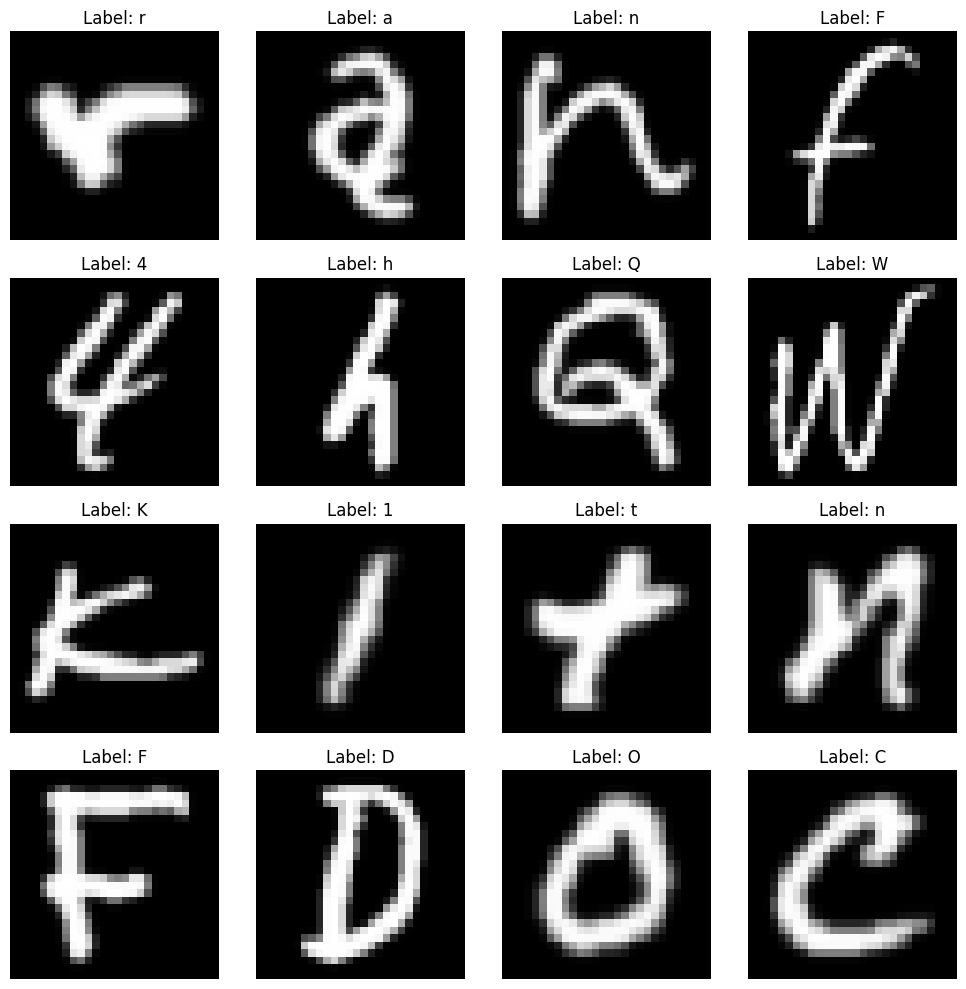

In [51]:
# Function to display images in a grid with labels
def display_images_grid(images, labels, map_dict, num_images=16, rows=4, cols=4):
    plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
    for i in range(num_images):
        img = images.iloc[i].values.reshape(28, 28).T  # Transpose to correct orientation
        label = labels.iloc[i]
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Label: {map_dict[label]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display first 16 images from the training data in a 4x4 grid
display_images_grid(train_data.drop(['label'], axis=1), train_data['label'], map_dict, num_images=16, rows=4, cols=4)


In [32]:
# why until 36? cuz this

# Digits: 0-9 (10 classes)
# Upper-case letters: A-Z (26 classes)
# Lower-case letters: a-z (11 classes)
acceptable_range = np.arange(0, 36)
train_data = train_data[train_data["label"].isin(acceptable_range)]
test_data = test_data[test_data["label"].isin(acceptable_range)]
np.sort(train_data.label.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [33]:
train_data.isnull().sum().head(10)

label    0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
dtype: int64

In [34]:
# Resetting data
train_data.reset_index(inplace = True)
train_data

,index,label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,3,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,112795,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86396,112796,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86397,112797,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86398,112798,31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
test_data.describe()

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,14400.000000,14400.0,14400.0,14400.0,14400.0,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,...,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0
mean,17.500000,0.0,0.0,0.0,0.0,0.007917,0.025764,0.014722,0.012222,0.014722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,10.388655,0.0,0.0,0.0,0.0,0.604236,2.012452,1.204803,1.019562,1.733652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,8.750000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,17.500000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,26.250000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,35.000000,0.0,0.0,0.0,0.0,63.000000,213.000000,108.000000,95.000000,208.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
print(train_data.columns)
print(test_data.columns)

Index(['index', 'label',       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783,     784],
      dtype='object', length=786)
Index(['label',       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783,     784],
      dtype='object', length=785)


## **2.Data Preparation**


In [37]:
round(train_data.drop('label', axis=1).mean(), 2)

index    56332.59
1            0.00
2            0.00
3            0.00
4            0.00
           ...   
780          0.00
781          0.00
782          0.00
783          0.00
784          0.00
Length: 785, dtype: float64

In [38]:
# Separating the X and Y variable

y = train_data['label']

# Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

# Printing the size of data 
print(train_data.shape)

(86400, 786)


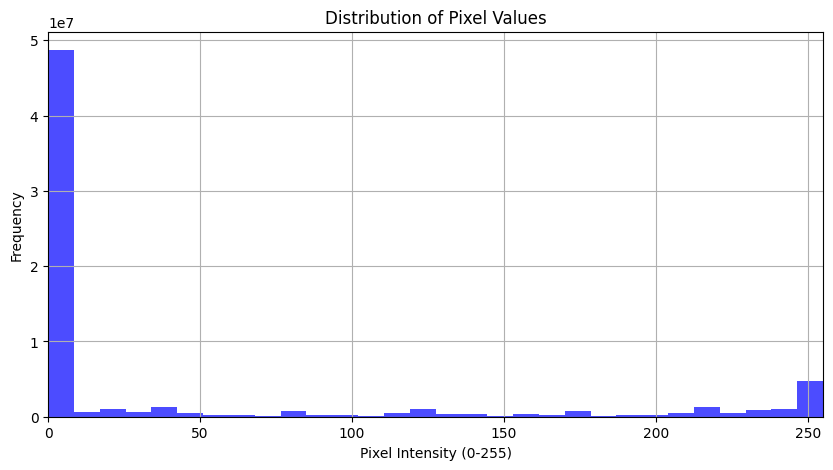

In [39]:
# Flatten all pixel values into a 1D array
pixel_values = train_data.drop(['label'], axis=1).values.flatten()

plt.figure(figsize=(10,5))
plt.hist(pixel_values, bins=30, color='blue', alpha=0.7, range=(0, 255))  # Set range to focus on 0-255
plt.title("Distribution of Pixel Values")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.xlim(0, 255)  # Limit the x-axis to the full range of pixel intensities
plt.grid(True)  # Add grid for better readability
plt.show()


In [40]:
# Min-Max Normalization
# X = X - Xmin/Xmax - Xmin

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (86400, 785)
test_data: (14400, 785)


In [16]:
# scaling the features
# uses standard deviation to further scale the features to fit the model like SD reduced to 1 from variance
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, train_size = 0.3 ,random_state = 10)

## **3. Model Soft Margin Support Vector Machine**

In [17]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

![Alt Text](./images/linear_svm.png)

In [18]:
# confusion matrix and accuracy
from sklearn import metrics
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.7333912037037037 

[[293   1   1 ...   0   0   1]
 [  0 257   0 ...   1   4   0]
 [  0   1 367 ...   3   0  54]
 ...
 [  0  13   2 ... 314  19   3]
 [  2  10   1 ...  25 297   0]
 [  0   0  94 ...   9   2 270]]


## **4. Kernel Support Vector Machine**

![Alt Text](./images/RBF.png)


In [19]:
# model projects the data into an infinite-dimensional space
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8234375 

[[359   0   0 ...   1   0   0]
 [  0 326   0 ...   0   5   0]
 [  0   1 380 ...   0   0  64]
 ...
 [  0   0   2 ... 376  25   4]
 [  0   5   0 ...   3 370   1]
 [  0   0  30 ...   2   1 386]]


## Using 5-fold cross validation and grid search to find optimal values of gamma and C.

![Alt Text](./images/Hyper_C.png)


In [20]:
#
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4], # [0.01,0.001,0.0001]
                     'C': [5,10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results



Fitting 5 folds for each of 6 candidates, totalling 30 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,248.228089,5.921161,93.976144,1.207883,5,0.01,"{'C': 5, 'gamma': 0.01}",0.616319,0.611497,0.607639,...,0.609105,0.004869,5,0.993007,0.993297,0.993152,0.993393,0.993586,0.993287,0.000199
1,55.133681,0.650980,70.538568,0.594266,5,0.001,"{'C': 5, 'gamma': 0.001}",0.829475,0.825231,0.824267,...,0.827739,0.002750,2,0.955392,0.954379,0.955681,0.955874,0.955440,0.955353,0.000517
2,49.345872,1.319270,72.576999,0.458883,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.780478,0.772569,0.769676,...,0.776813,0.004742,4,0.823881,0.823447,0.826582,0.824026,0.822868,0.824161,0.001276
3,257.667317,8.243842,95.052612,1.186179,10,0.01,"{'C': 10, 'gamma': 0.01}",0.614969,0.608989,0.606867,...,0.607446,0.005002,6,0.997299,0.997830,0.997444,0.997541,0.997348,0.997492,0.000188
4,56.572646,1.494131,71.110963,0.631646,10,0.001,"{'C': 10, 'gamma': 0.001}",0.829090,0.830440,0.824074,...,0.828549,0.003568,1,0.967689,0.967689,0.968412,0.968895,0.968605,0.968258,0.000489
5,42.068590,0.492795,70.983135,2.242833,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.786073,0.778742,0.781057,...,0.784838,0.004536,3,0.851225,0.852334,0.854601,0.851900,0.851948,0.852402,0.001156


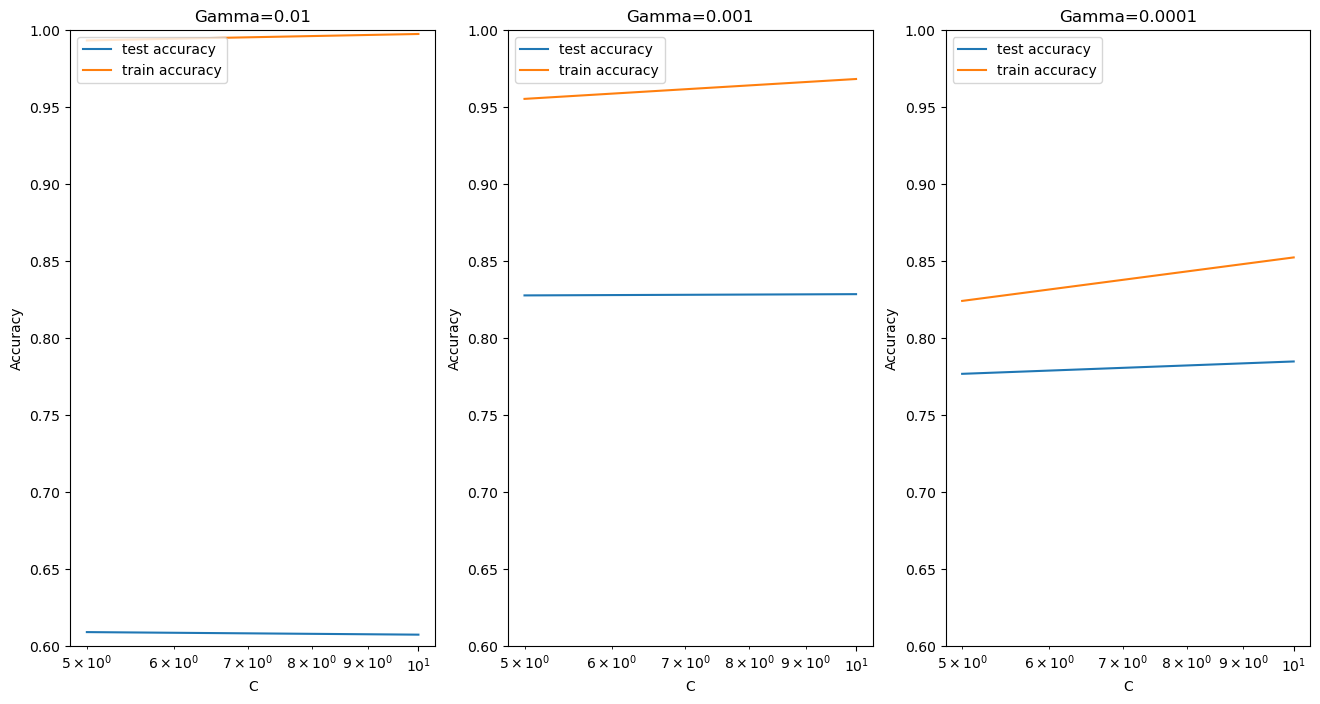

In [21]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [22]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.8388888888888889 

[[336   0   0 ...   0   0   0]
 [  0 290   0 ...   0   2   0]
 [  0   0 398 ...   1   0  48]
 ...
 [  0   1   2 ... 384  15   4]
 [  1   2   1 ...   4 390   2]
 [  1   0  40 ...   2   1 379]] 

